In [1]:
from ga4stpg.util import STEIN_B
from ga4stpg.graph import ReaderORLibrary

from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.generate import GenerateBasedPrimRST
from ga4stpg.selector import roullete, tournament
from ga4stpg.customevol import SteinerIndividual
from ga4stpg.normalization import normalize

In [2]:
import config

In [3]:
import seaborn as sns
from os import path

from operator import attrgetter

In [4]:
def displot(population, key='cost'):
    getter = attrgetter(key)
    values = [ getter(c) for c in population]

    return sns.displot(values)

In [5]:
INDEX = 9
pop_size = 50
filename = STEIN_B[INDEX][0]

print(filename)

filename = path.join(config.dataset_directory, filename)
stpg = ReaderORLibrary().parser(filename)

gen_primRST = GenerateBasedPrimRST(stpg)
evaluator = EvaluateTreeGraph(stpg)


population = list()

for _ in range(pop_size):
    tree = gen_primRST()
    _cost, _partitions = evaluator(tree)
    individual = SteinerIndividual(chromosome=tree, cost=_cost)
    population.append(individual)


steinb10.txt


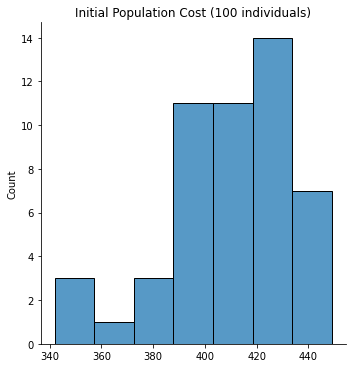

In [6]:
ax = displot(population,key='cost')

ax.set(title="Initial Population Cost (100 individuals)")

In [7]:
population = sorted(population, 
                    key=attrgetter('cost'), 
                    reverse=False)[:50]

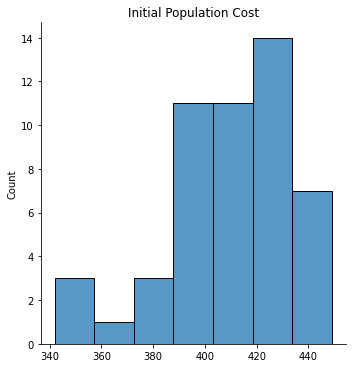

In [8]:
ax = displot(population,key='cost')

ax.set(title="Initial Population Cost")

In [9]:
population = normalize(population)

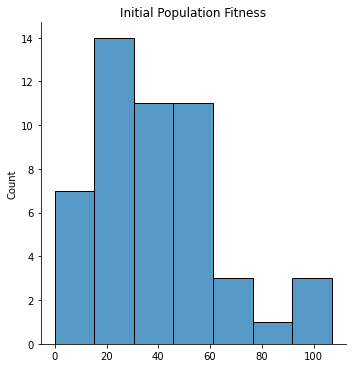

In [10]:
ax = displot(population, key='fitness')
ax.set(title="Initial Population Fitness")

In [11]:
population2 = roullete(population)

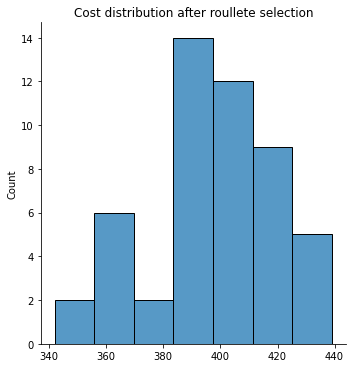

In [12]:
ax = displot(population2, key='cost')
ax.set(title="Cost distribution after roullete selection")

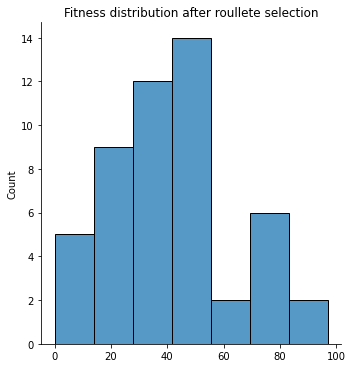

In [13]:
population2 = normalize(population2)

ax = displot(population2, key='fitness')
ax.set(title="Fitness distribution after roullete selection")

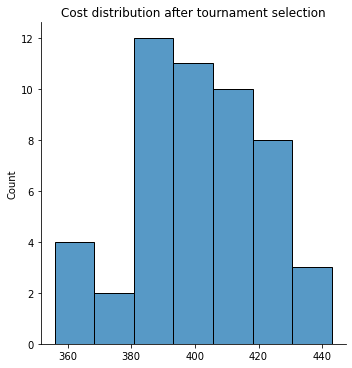

In [14]:
population3 = tournament(population)
ax = displot(population3, key='cost')
ax.set(title="Cost distribution after tournament selection")

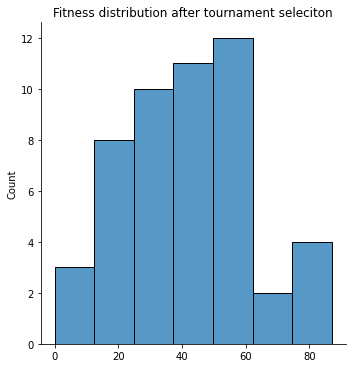

In [15]:
population3 = normalize(population3)

ax = displot(population3, key='fitness')
ax.set(title="Fitness distribution after tournament seleciton")